# Lecture 3: Exploratory Data Analysis


# 3.1 Get to know the data table



In this lecture, we will be using proteomics data from [CPTAC](https://proteomics.cancer.gov/programs/cptac). We will use a [python package](https://github.com/PayneLab/cptac) developed by the Payne lab to easily query CPTAC data. 

In [ ]:
%%capture
!pip install cptac

In [ ]:
%%capture
import numpy as np
import pandas as pd
import cptac
import matplotlib.pyplot as plt
import seaborn as sns

The Cancer Proteomic Tumor Analysis Consortium has profiled many types of cancers. We can see what data is available from the consortium by listing the datasets available through the cptac package.

In [ ]:
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


We will work with Endometrial cancer data.

In [ ]:
cptac.download(dataset='endometrial', version='2.1.1')
en = cptac.Endometrial()
en.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	144 rows
	10862 columns
circular_RNA
	109 rows
	4945 columns
clinical
	144 rows
	27 columns
CNV
	95 rows
	28057 columns
derived_molecular
	144 rows
	125 columns
experimental_design
	144 rows
	26 columns
followup
	396 rows
	49 columns
miRNA
	99 rows
	2337 columns
phosphoproteomics
	144 rows
	73212 columns
proteomics
	144 rows
	10999 columns
somatic_mutation
	52560 rows
	3 columns
somatic_mutation_binary
	95 rows
	51559 columns
transcriptomics
	109 rows
	28057 columns


Get molecular subtyping and marker information:



In [ ]:
molecular = en.get_derived_molecular()
molecular.shape

(144, 125)

In [ ]:
molecular.head()

Name,Estrogen_Receptor,Estrogen_Receptor_%,Progesterone_Receptor,Progesterone_Receptor_%,MLH1,MLH2,MSH6,PMS2,p53,Other_IHC_specify,...,Log2_variant_total,Log2_SNP_total,Log2_INDEL_total,Genomics_subtype,Mutation_signature_C>A,Mutation_signature_C>G,Mutation_signature_C>T,Mutation_signature_T>C,Mutation_signature_T>A,Mutation_signature_T>G
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,Cannot be determined,NaN,Cannot be determined,NaN,Intact nuclear expression,Intact nuclear expression,Loss of nuclear expression,Intact nuclear expression,Cannot be determined,NaN,...,10.062046,9.984418,5.832890,MSI-H,8.300395,1.482213,72.529644,14.426877,1.383399,1.877470
C3L-00008,Cannot be determined,NaN,Cannot be determined,NaN,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Loss of nuclear expression,Cannot be determined,NaN,...,8.861087,8.330917,7.169925,MSI-H,14.641745,2.803738,64.485981,15.264798,0.934579,1.869159
C3L-00032,Cannot be determined,NaN,Cannot be determined,NaN,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Cannot be determined,NaN,...,5.321928,5.000000,3.169925,CNV_low,16.129032,3.225806,70.967742,3.225806,3.225806,3.225806
C3L-00090,Cannot be determined,NaN,Cannot be determined,NaN,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Cannot be determined,NaN,...,5.672425,5.523562,2.584963,CNV_low,17.777778,8.888889,62.222222,8.888889,2.222222,0.000000
C3L-00098,Cannot be determined,NaN,Cannot be determined,NaN,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Intact nuclear expression,Normal,NaN,...,6.108524,5.954196,3.000000,CNV_high,9.836066,13.114754,62.295082,3.278689,8.196721,3.278689


Get clinical data frame

In [ ]:
clinical = en.get_clinical()
clinical.shape

(144, 27)

In [ ]:
clinical.index.values

array(['C3L-00006', 'C3L-00008', 'C3L-00032', 'C3L-00090', 'C3L-00098',
       'C3L-00136', 'C3L-00137', 'C3L-00139', 'C3L-00143', 'C3L-00145',
       'C3L-00156', 'C3L-00161', 'C3L-00358', 'C3L-00361', 'C3L-00362',
       'C3L-00413', 'C3L-00449', 'C3L-00563', 'C3L-00586', 'C3L-00601',
       'C3L-00605', 'C3L-00767', 'C3L-00769', 'C3L-00770', 'C3L-00771',
       'C3L-00780', 'C3L-00781', 'C3L-00905', 'C3L-00918', 'C3L-00921',
       'C3L-00932', 'C3L-00942', 'C3L-00946', 'C3L-00947', 'C3L-00949',
       'C3L-00961', 'C3L-00963', 'C3L-01246', 'C3L-01248', 'C3L-01249',
       'C3L-01252', 'C3L-01256', 'C3L-01257', 'C3L-01275', 'C3L-01282',
       'C3L-01304', 'C3L-01307', 'C3L-01311', 'C3L-01312', 'C3L-01744',
       'C3L-01925', 'C3N-00151', 'C3N-00200', 'C3N-00321', 'C3N-00322',
       'C3N-00323', 'C3N-00324', 'C3N-00326', 'C3N-00328', 'C3N-00333',
       'C3N-00334', 'C3N-00335', 'C3N-00337', 'C3N-00339', 'C3N-00340',
       'C3N-00377', 'C3N-00379', 'C3N-00383', 'C3N-00386', 'C3N-

In [ ]:
clinical.head()

Name,Sample_ID,Sample_Tumor_Normal,Proteomics_Tumor_Normal,Country,Histologic_Grade_FIGO,Myometrial_invasion_Specify,Histologic_type,Treatment_naive,Tumor_purity,Path_Stage_Primary_Tumor-pT,...,Age,Diabetes,Race,Ethnicity,Gender,Tumor_Site,Tumor_Site_Other,Tumor_Focality,Tumor_Size_cm,Num_full_term_pregnancies
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,S001,Tumor,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,64.0,No,White,Not-Hispanic or Latino,Female,Anterior endometrium,NaN,Unifocal,2.9,1
C3L-00008,S002,Tumor,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,58.0,No,White,Not-Hispanic or Latino,Female,Posterior endometrium,NaN,Unifocal,3.5,1
C3L-00032,S003,Tumor,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,50.0,Yes,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,4.5,4 or more
C3L-00090,S005,Tumor,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),...,75.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,3.5,4 or more
C3L-00098,S006,Tumor,Tumor,United States,NaN,under 50 %,Serous,YES,Normal,pT1a (FIGO IA),...,63.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,6.0,2


Now we can explore the variables in the dataset:

In [ ]:
clinical['Gender'].value_counts()

Female    95
Name: Gender, dtype: int64

In [ ]:
clinical['tumor_Stage-Pathological'].value_counts()

Stage I      68
Stage III    13
Stage II     10
Stage IV      4
Name: tumor_Stage-Pathological, dtype: int64

Count NA in each column:

In [ ]:
clinical.isna().sum()

Name
Sample_ID                         0
Sample_Tumor_Normal               0
Proteomics_Tumor_Normal           0
Country                          49
Histologic_Grade_FIGO            61
Myometrial_invasion_Specify      49
Histologic_type                  49
Treatment_naive                  49
Tumor_purity                     49
Path_Stage_Primary_Tumor-pT      49
Path_Stage_Reg_Lymph_Nodes-pN    49
Clin_Stage_Dist_Mets-cM          49
Path_Stage_Dist_Mets-pM          49
tumor_Stage-Pathological         49
FIGO_stage                       49
LVSI                             51
BMI                              49
Age                              49
Diabetes                         50
Race                             86
Ethnicity                        86
Gender                           49
Tumor_Site                       49
Tumor_Site_Other                 74
Tumor_Focality                   49
Tumor_Size_cm                    50
Num_full_term_pregnancies        49
dtype: int64

Why are there so many missing values? Let's take a closer look at the data table:

In [ ]:
clinical.tail()

Name,Sample_ID,Sample_Tumor_Normal,Proteomics_Tumor_Normal,Country,Histologic_Grade_FIGO,Myometrial_invasion_Specify,Histologic_type,Treatment_naive,Tumor_purity,Path_Stage_Primary_Tumor-pT,...,Age,Diabetes,Race,Ethnicity,Gender,Tumor_Site,Tumor_Site_Other,Tumor_Focality,Tumor_Size_cm,Num_full_term_pregnancies
Patient_ID,,,,,,,,,,,,,,,,,,,,,
NX5.N,S140,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX6.N,S141,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX7.N,S142,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX8.N,S143,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NX9.N,S144,Normal,Enriched_normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.crosstab(clinical['Histologic_type'], clinical['Sample_Tumor_Normal'])

Sample_Tumor_Normal,Tumor
Histologic_type,
Endometrioid,83
Serous,12


It makes sense that `Histological_type` is only available in tumor samples and is missing in all normal samples. Such relations are very common and may remind us of the scope and potential bias in our data.

In [ ]:
clinical['Country'].value_counts()

United States    34
Ukraine          32
Other_specify    24
Poland            5
Name: Country, dtype: int64

In [ ]:
pd.crosstab(clinical['Race'], clinical['Country'])

Country,Other_specify,United States
Race,,
Asian,1,0
Black or African American,0,3
Not Reported,1,0
White,22,31


We can take a more quantative look at the data with summary statistics:

In [ ]:
clinical.describe()

Name,LVSI,BMI,Age,Tumor_Size_cm
count,93.000000,95.000000,95.000000,94.000000
mean,0.301075,35.007368,63.473684,3.688298
std,0.461212,10.480389,10.109867,2.186658
min,0.000000,17.110000,38.000000,0.800000
25%,0.000000,28.165000,58.000000,2.300000
50%,0.000000,33.650000,64.000000,3.500000
75%,1.000000,39.055000,69.000000,4.500000
max,1.000000,71.090000,90.000000,13.500000


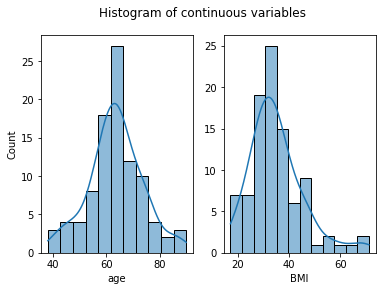

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(ax=ax1, data=clinical, x="Age", kde=True)
ax1.set(xlabel='age')
sns.histplot(ax=ax2, data=clinical, x="BMI", kde=True)
ax2.set(xlabel='BMI')
ax2.set(ylabel=None)
fig.suptitle('Histogram of continuous variables')
fig.show()

# 3.2 Data preprocessing

We can convert a continuous variable into a categorical variable. For example, BMI can be stratified according to CDC standard (Below 18.5=Underweight;
18.5—24.9=Normal; 25.0—29.9=Overweight; 30.0 and Above=Obese)

In [ ]:
clinical['BMI_cat']=pd.cut(clinical['BMI'], [0, 18.5, 25, 30, np.inf], labels=["Underweight", "Normal", "Overweight", 'Obese'])
clinical['BMI_cat'].value_counts()

Obese          64
Overweight     20
Normal          8
Underweight     3
Name: BMI_cat, dtype: int64

Reversely, ordinal variables such as tumor_Stage-Pathological can be transformed into numerical variables:

In [ ]:
clinical['tumor_Stage-Pathological_num'] = clinical['tumor_Stage-Pathological'].replace({'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4})
clinical['tumor_Stage-Pathological_num'].value_counts()

1.0    68
3.0    13
2.0    10
4.0     4
Name: tumor_Stage-Pathological_num, dtype: int64

Create dummy variables for Tumor site (suppose we only care about anterior and posterior endometrium)

In [ ]:
clinical['Tumor_Site'].value_counts()

Other, specify           70
Anterior endometrium     18
Posterior endometrium     7
Name: Tumor_Site, dtype: int64

In [ ]:
clinical['Tumor_Site_Other'].value_counts()

Entire uterine cavity                                                       13
Uterine cavity                                                              11
Anterior and Posterior endometrium                                           7
Both anterior and posterior                                                  5
Anterior and Posterior                                                       5
Entire uterine cavity.                                                       3
Entire Uterine Cavity                                                        3
Anterior and Posterior Endometrium                                           2
Both anterior and posterior endometrium                                      2
Anterior and posterior endometrium                                           2
Endometrium                                                                  2
along anterior and posterior surface                                         2
Bulky tumor involving both anterior and posterior wa

In [ ]:
A1 = clinical['Tumor_Site'].str.contains('Anterior').astype('float').fillna(0) 
A2 = clinical['Tumor_Site_Other'].str.contains('Anterior|anterior').astype('float').fillna(0) 
clinical['Tumor_Site_Anterior'] = A1+A2

P1 = clinical['Tumor_Site'].str.contains('Posterior').astype('float').fillna(0) 
P2 = clinical['Tumor_Site_Other'].str.contains('Posterior|posterior').astype('float').fillna(0) 
clinical['Tumor_Site_Posterior'] = P1+P2

In [ ]:
clinical['Tumor_Site_Anterior'].value_counts()

0.0    93
1.0    51
Name: Tumor_Site_Anterior, dtype: int64

In [ ]:
clinical['Tumor_Site_Posterior'].value_counts()

0.0    104
1.0     40
Name: Tumor_Site_Posterior, dtype: int64

It is known that beta-catenin mutation is a key driver in endemetrial cancer ( [Dou et al. 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7233456/)). The CPTAC data provided an opportunity to closely examine the effect of such mutation on protein level. As beta-catenin involves in the Wnt signaling pathway, we want to sepcifically focus on these proteins. Here we can use some external domain knowledge to subset the data. Genes in the canonical Wnt signaling pathway can be found [here](https://www.gsea-msigdb.org/gsea/msigdb/cards/HALLMARK_WNT_BETA_CATENIN_SIGNALING).   

In [ ]:
wnt_pathway = ['ADAM17', 'AXIN1', 'AXIN2', 'CCND2', 'CSNK1E', 'CTNNB1', 'CUL1', 'DKK1', 'DKK4', 'DLL1', 'DVL2',
               'FRAT1', 'FZD1', 'FZD8', 'GNAI1', 'HDAC11', 'HDAC2', 'HDAC5', 'HEY1', 'HEY2', 'JAG1', 'JAG2', 'KAT2A',
               'LEF1', 'MAML1', 'MYC', 'NCOR2', 'NCSTN', 'NKD1', 'NOTCH1', 'NOTCH4', 'NUMB', 'PPARD', 'PSEN2', 'PTCH1',
               'RBPJ', 'SKP2', 'TCF7', 'TP53', 'WNT1', 'WNT5B', 'WNT6']

In [ ]:
pr = en.get_proteomics()
pr.shape

(144, 10999)

In [ ]:
pr.head()

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,-0.664,...,-0.08770,NaN,0.0229,0.1090,NaN,-0.332,-0.43300,-1.020,-0.1230,-0.0859
C3L-00008,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,-0.367,...,-0.03560,NaN,0.3630,1.0700,0.737,-0.564,-0.00461,-1.130,-0.0757,-0.4730
C3L-00032,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,-0.500,...,0.00112,-0.1450,0.0105,-0.1160,NaN,0.151,-0.07400,-0.540,0.3200,-0.4190
C3L-00090,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,-0.223,...,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.398,-0.07520,-0.797,-0.0301,-0.4670
C3L-00098,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,-0.101,...,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.646,0.20700,-1.850,-0.1760,0.0513


Let's try subsetting the Wnt pathway gene from our proteomics data:

In [ ]:
pr_wnt = pr[wnt_pathway]

KeyError: ignored

It is common that when trying to match two datasets, only a portion of features were found in both. We may have to only use the intersection. 

In [ ]:
wnt_proteins = list(set(pr.columns.values) & set(wnt_pathway)) 
print(wnt_proteins)
pr_wnt = pr[wnt_proteins]
pr_wnt.head()

['NOTCH1', 'DKK4', 'CUL1', 'TCF7', 'HDAC5', 'JAG1', 'GNAI1', 'RBPJ', 'WNT5B', 'NCSTN', 'CTNNB1', 'HDAC2', 'SKP2', 'CCND2', 'DVL2', 'PSEN2', 'TP53', 'HDAC11', 'MAML1', 'NKD1', 'KAT2A', 'ADAM17', 'FZD1', 'DKK1', 'NUMB', 'LEF1', 'AXIN1', 'NCOR2']


Name,NOTCH1,DKK4,CUL1,TCF7,HDAC5,JAG1,GNAI1,RBPJ,WNT5B,NCSTN,...,MAML1,NKD1,KAT2A,ADAM17,FZD1,DKK1,NUMB,LEF1,AXIN1,NCOR2
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-0.5830,-0.261,0.00369,-0.963,-0.4510,0.3590,-0.1750,-0.0262,NaN,-0.0433,...,-0.0144,-0.561,0.18700,0.554,-0.352,-1.920,-0.13600,1.550,0.2850,-0.0799
C3L-00008,0.0959,0.611,-0.21800,-0.754,-0.5880,-0.0190,-1.8000,-0.0259,-1.24,0.5060,...,0.1690,NaN,0.44500,0.200,0.166,-0.737,-0.19400,-1.430,0.2720,-0.3040
C3L-00032,-0.3210,-0.909,0.04890,NaN,-0.0781,0.0159,-0.9850,-0.5400,NaN,-0.0191,...,-0.1570,NaN,-0.00205,0.094,0.116,NaN,-0.00992,-0.529,NaN,-0.1090
C3L-00090,-0.6400,1.100,0.15600,-0.536,-0.5400,0.1250,-1.0300,-0.1820,NaN,-0.1240,...,0.0419,NaN,0.14900,0.707,1.530,-0.251,-0.19000,1.630,-1.2600,-0.2610
C3L-00098,0.2630,-1.700,0.26200,-1.300,-0.6410,0.3930,0.0766,0.0578,NaN,0.2290,...,-0.3910,0.187,0.59400,0.389,-1.580,NaN,0.78500,-2.040,0.0979,-0.8210


We also want to match the Wnt proteomics data and CTNNB1 mutation data.

In [ ]:
mutation = en.get_somatic_mutation_binary()
print(mutation.shape)
mutation.head()

(95, 51559)


Name,A1BG_p.E298K,A1BG_p.S181N,A1CF_p.F487L,A1CF_p.S236Y,A2ML1_p.A8V,A2ML1_p.G1306D,A2ML1_p.L1347F,A2ML1_p.L82I,A2ML1_p.P712S,A2ML1_p.R443Q,...,ZYG11A_p.Q442H,ZYG11B_p.H315R,ZYG11B_p.R495M,ZYG11B_p.R728C,ZYX_p.C447Y,ZZEF1_p.A2723V,ZZEF1_p.D845Y,ZZEF1_p.K1251E,ZZEF1_p.K2387Sfs*40,ZZZ3_p.Y891C
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Our data recorded mutations at different loci within the same gene. As a very preliminary step we could try aggregate them to the gene level.

In [ ]:
ctnnb1 = mutation[[col for col in mutation.columns if 'CTNNB1' in col]]
ctnnb1.head()

Name,CTNNB1_p.D32G,CTNNB1_p.D32H,CTNNB1_p.D32N,CTNNB1_p.D32V,CTNNB1_p.D32Y,CTNNB1_p.D32_S33delinsA,CTNNB1_p.D412Y,CTNNB1_p.E334K,CTNNB1_p.G34E,CTNNB1_p.G34R,...,CTNNB1_p.R587Q,CTNNB1_p.R90Q,CTNNB1_p.S33C,CTNNB1_p.S33F,CTNNB1_p.S33P,CTNNB1_p.S33Y,CTNNB1_p.S37A,CTNNB1_p.S37F,CTNNB1_p.S45del,CTNNB1_p.T41I
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3L-00098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ctnnb1_gene = ctnnb1.agg(axis='columns', func='max')  # aggregate by counting how many patients have at least one mutation in the gene.
ctnnb1_gene = ctnnb1_gene.to_frame(name='ctnnb1_mut')
ctnnb1_gene.value_counts()


ctnnb1_mut
0             66
1             29
dtype: int64

# 3.3 Find patterns and relations in data

Scatter plots can reveal relations between continuous variables:

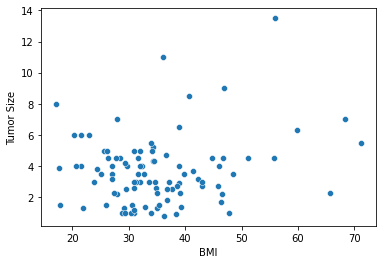

In [ ]:
ax = sns.scatterplot(data=clinical, x='BMI', y='Tumor_Size_cm')
ax.set(ylabel='Tumor Size')
plt.show()

Values of continous variables can be grouped within categories:

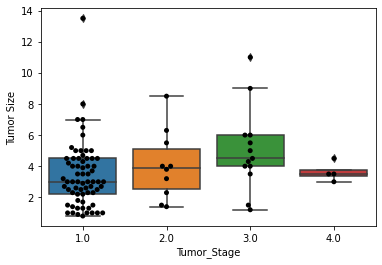

In [ ]:
ax = sns.boxplot(data=clinical, x="tumor_Stage-Pathological_num", y="Tumor_Size_cm")
ax = sns.swarmplot(data=clinical, x="tumor_Stage-Pathological_num", y="Tumor_Size_cm", color='black')
ax.set(xlabel='Tumor_Stage')
ax.set(ylabel='Tumor Size')
plt.show()

We then look at the relation between CTNNB1 mutation status and the protein abundance levels. This requires merging two dataframes.

In [ ]:
ctnnb1_dat = pd.concat([pr_wnt, ctnnb1_gene], axis=1, join="inner")
print(ctnnb1_dat.shape)
ctnnb1_dat.head()

(95, 29)


,NOTCH1,DKK4,CUL1,TCF7,HDAC5,JAG1,GNAI1,RBPJ,WNT5B,NCSTN,...,NKD1,KAT2A,ADAM17,FZD1,DKK1,NUMB,LEF1,AXIN1,NCOR2,ctnnb1_mut
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-0.5830,-0.261,0.00369,-0.963,-0.4510,0.3590,-0.1750,-0.0262,NaN,-0.0433,...,-0.561,0.18700,0.554,-0.352,-1.920,-0.13600,1.550,0.2850,-0.0799,0
C3L-00008,0.0959,0.611,-0.21800,-0.754,-0.5880,-0.0190,-1.8000,-0.0259,-1.24,0.5060,...,NaN,0.44500,0.200,0.166,-0.737,-0.19400,-1.430,0.2720,-0.3040,0
C3L-00032,-0.3210,-0.909,0.04890,NaN,-0.0781,0.0159,-0.9850,-0.5400,NaN,-0.0191,...,NaN,-0.00205,0.094,0.116,NaN,-0.00992,-0.529,NaN,-0.1090,0
C3L-00090,-0.6400,1.100,0.15600,-0.536,-0.5400,0.1250,-1.0300,-0.1820,NaN,-0.1240,...,NaN,0.14900,0.707,1.530,-0.251,-0.19000,1.630,-1.2600,-0.2610,0
C3L-00098,0.2630,-1.700,0.26200,-1.300,-0.6410,0.3930,0.0766,0.0578,NaN,0.2290,...,0.187,0.59400,0.389,-1.580,NaN,0.78500,-2.040,0.0979,-0.8210,0


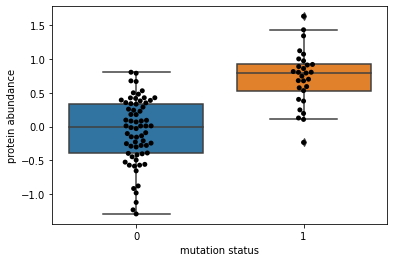

In [ ]:
ax = sns.boxplot(data=ctnnb1_dat, x="ctnnb1_mut", y="CTNNB1")
ax = sns.swarmplot(data=ctnnb1_dat, x="ctnnb1_mut", y="CTNNB1", color='black')
ax.set(xlabel='mutation status')
ax.set(ylabel='protein abundance')
plt.show()